# アニメデータ
http://www.nurs.or.jp/~nagadomi/animeface-character-dataset/ から取得する。

同じディレクトリに、animefaceというフォルダで存在していることを想定している

In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from PIL import Image
from os.path import join, relpath
from glob import glob

import pandas as pd
import urllib.request
import urllib
import urllib.parse 

%matplotlib inline
from matplotlib import pylab as plt
from PIL import Image


サイズがバラバラだったので、画像ファイルを真ん中で切り取る。

また、サイズが大きすぎると時間がかかるので28x28にリサイズする

In [2]:
def reformat_image(file_name, save_name):
    img = Image.open(file_name)
    half_the_width = int(img.size[0] / 2)
    half_the_height =int(img.size[1] / 2)
    min_size = half_the_width
    if min_size > half_the_height:
        min_size = half_the_height

    half_mini_size = int(min_size)

    img = img.crop(
        (
            half_the_width - half_mini_size,
            half_the_height - half_mini_size,
            half_the_width + half_mini_size,
            half_the_height + half_mini_size
        )
    )
    img = img.resize((28,28))
    img.save(save_name)
    plt.imshow( img )

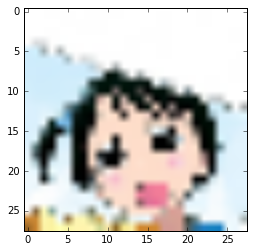

In [4]:
from os.path import join, relpath
from glob import glob
path = 'animeface/thumb'
folders = glob(join(path, '*'))
for folder in folders:
    for file in glob(join(folder, "*.png")):
        reformat_image(file, file.replace("animeface","square_animeface_28")) # フォルダがないと実行されないので、animefaceを複製して、renameしておく

In [5]:
def to_gray_array(image):
    """
    画像をグレースケールのarrayに変更するメソッド
    """
    img_array = np.asarray(image) / 255
    rgb=[]
    for row in img_array:
        for col in row:
            rgb.append(col[0]+col[1]+col[2])
    img_rgb=np.array(rgb,  dtype=np.float32)/3
    return img_rgb

In [6]:
def to_rgb_array(image):
    img_array = np.asarray(image) / 255
    r=[]
    g=[]
    b=[]
    for row in img_array:
        for col in row:
            r.append(col[0])
            g.append(col[1])
            b.append(col[2])
    img_rgb=np.array(r+g+b,  dtype=np.float32)
    return img_rgb

In [11]:
def create_dataset(path= "square_animeface/thumb") :
    imgs = []
    flags = []
        
    i = 0
    for folder in glob(join(path, '*')):
        for file in glob(join(folder, '*.png')):
            imgs.append(to_gray_array(Image.open(file)))
            if file.find("hatsune_miku") > -1:
                flags.append(1)
            else:
                flags.append(0)
        i += 1
        if i > 10 : break # 多くなりすぎるので、10キャラぐらいでやめておく
                
    imgs = np.array(imgs).astype("float32")
    flags = np.array(flags).astype("int32")    
    return imgs, flags

In [12]:
def create_rgb_dataset(path= "square_animeface_28/thumb") :
    imgs = []
    flags = []
        
    i = 0
    for folder in glob(join(path, '*')):
        for file in glob(join(folder, '*.png')):
            imgs.append(to_rgb_array(Image.open(file)))
            if file.find("hatsune_miku") > -1:
                flags.append(1)
            else:
                flags.append(0)
        i += 1
        if i > 10 : break # 多くなりすぎるので、10キャラぐらいでやめておく
                
    imgs = np.array(imgs).astype("float32")
    flags = np.array(flags).astype("int32")    
    return imgs, flags

In [13]:
def draw_gray(data, size=28):
    plt.figure(figsize=(3, 3))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,size-1)
    plt.ylim(0,size-1)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

In [14]:
def draw_rgb(data, size=28):
    data = data.reshape(3,28,28)
    data = data.transpose(1, 2, 0)*255
    pil_image = Image.fromarray(np.clip(data, 0, 255).astype(np.uint8))
    plt.imshow( pil_image )

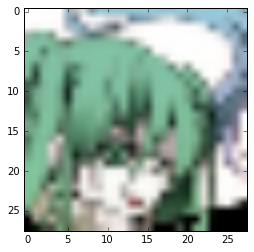

In [15]:
# imgs, flags = create_dataset()
# draw_gray(imgs[0])
imgs, flags = create_rgb_dataset()
draw_rgb(imgs[0])

In [16]:
# save for gray color
# np.savetxt("square_animeface/imgs", imgs)
# np.savetxt("square_animeface/flags", flags)

# save for 28 color
np.savetxt("square_animeface_28/imgs", imgs)
np.savetxt("square_animeface_28/flags", flags)